In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
import pyreadr
df1 =  pd.read_csv("nobel_prize_data/data/academictreesubset.csv")
df1=df1.drop(columns=['homepage', 'addedby', 'dateadded'])
df1

,Academic_Tree_ID,pid,middlename,lastname,degrees,location,locid,area,majorarea,award,hindex,orcid_id,s2id
0,64,Torsten,NaN,Wiesel,NaN,Rockefeller University,253.0,Visual system,neuro,nobel,62.0,NaN,2629471.0
1,110,Wilder,NaN,Penfield,NaN,McGill University,160.0,"neurosurgery, stimulation",neuro,NaN,4.0,NaN,79908388.0
2,114,John,Carew,Eccles,D.Phil.,Australian National University,2128.0,Synapses,"neuro,physiology",Nobel,3.0,NaN,49799042.0
3,115,Charles,Scott,Sherrington,"M.R.C.S, M.B., L.R.C.P.",University of Oxford,228.0,"Neurophysiology, spinal reflexes","neuro,physiology",Nobel,NaN,NaN,NaN
4,116,Edgar,Douglas,Adrian,NaN,University of Cambridge,370.0,NaN,"neuro,physiology",nobel,24.0,NaN,4767554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,758695,Johann,Elert,Bode,NaN,Berlin Observatory,30943.0,NaN,physics,NaN,NaN,NaN,NaN
1414,70050,John,NaN,Chipman,NaN,"University of Michigan, Ann Arbor",405.0,physical chemistry of iron- and steelmaking,chemistry,NaN,NaN,NaN,NaN
1415,206,Harvey,Williams,Cushing,NaN,Yale University,507.0,Neurosurgery,"neuro,neurosurgery",NaN,NaN,NaN,NaN
1416,800472,Bertil,NaN,Daneholt,NaN,Karolinska Institute,123.0,NaN,cellbio,NaN,42.0,NaN,5549166.0


In [2]:
df1['award'] = df1['award'].replace(['Nobel'], 'nobel')
df1['award'] = df1['award'].replace(['nobel 1956'], 'nobel')

df1['award'].value_counts()

nobel                                                          319
National Medal of Science                                        1
NAS 1954, National Medal of Science 1974, Olympic Medal1952      1
Gottfried-Keller-Preis (1962)                                    1
Royal Medal                                                      1
Name: award, dtype: int64

In [3]:
df1 = df1[df1['award'] == 'nobel']
df1['area'] = df1['area'].replace(['physics'], 'Physics')
counts =df1["area"].value_counts()
counts 

/tmp/ipykernel_1159433/3144465427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['area'] = df1['area'].replace(['physics'], 'Physics')


Biochemistry                                     10
Physics                                           9
Nuclear chemistry                                 7
Organic chemistry, natural products chemistry     6
Physical chemistry, chemical kinetics             6
                                                 ..
Bacteriology, Pharmacology, Immunology            1
Pharmacology, Pathology                           1
Insecticides                                      1
Bacteriology, typhus                              1
microwave physics, masers and lasers              1
Name: area, Length: 171, dtype: int64

In [4]:
exploded_data = pd.DataFrame(pd.Series(df1['area'].dropna().str.split(',').tolist()).explode().reset_index(drop=True)).rename(columns={0:'research_area'})
exploded_data['count'] = 1
exploded_data=exploded_data.groupby('research_area').sum().sort_values('count', ascending=False)
exploded_data.reset_index(inplace=True)
exploded_data

,research_area,count
0,Organic chemistry,13
1,Physical chemistry,13
2,Biochemistry,13
3,Physics,9
4,Nuclear chemistry,7
...,...,...
210,Electromagnetism,1
211,Electron diffraction,1
212,Electronic Structure,1
213,Fruit Flies,1


/tmp/ipykernel_1159433/798017585.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


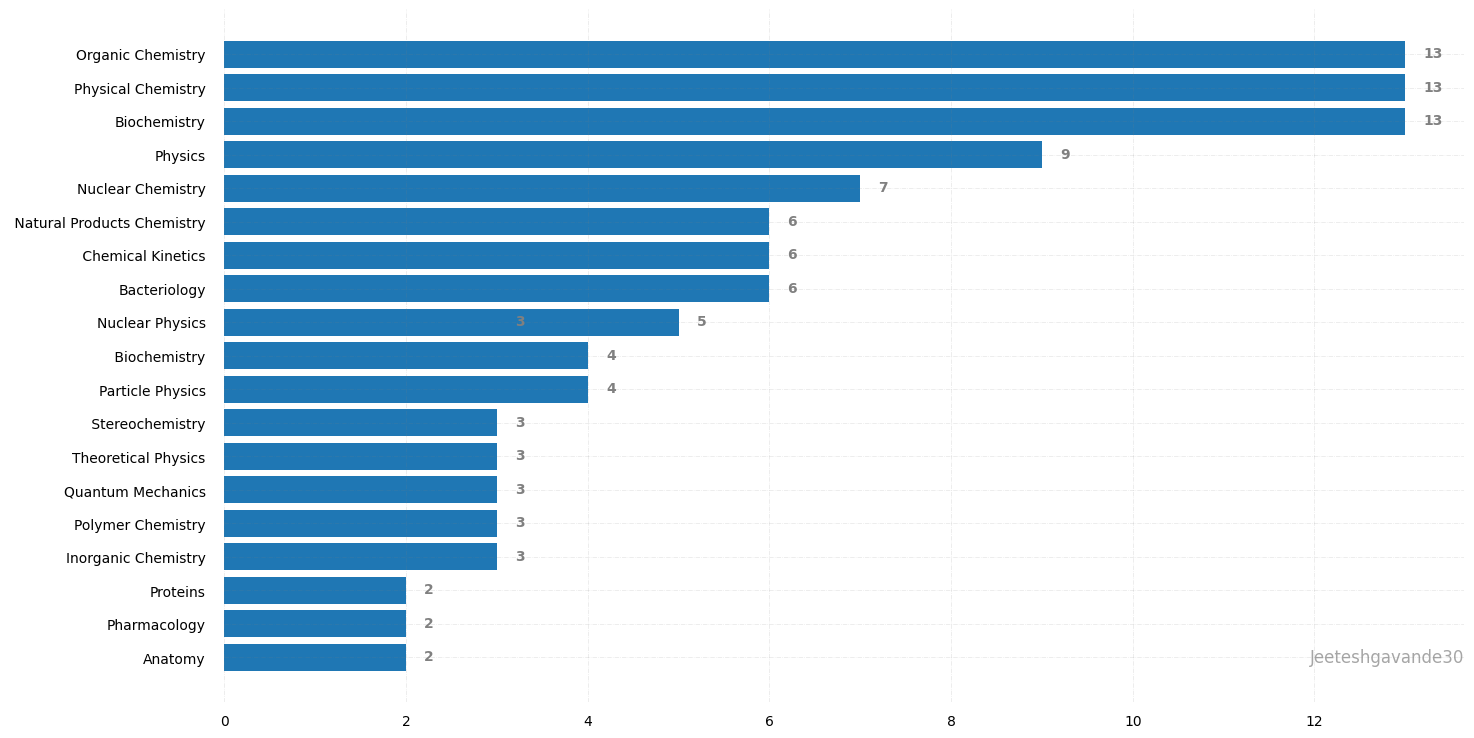

In [5]:
name =  exploded_data["research_area"].head(20)
coun = exploded_data["count"].head(20)
name=name.str.title()
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(name, coun)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
plt.show()

In [6]:
counts =df1["majorarea"].value_counts()
counts

physics                                        92
chemistry                                      88
neuro                                          15
idtree                                         13
neuro,chemistry                                 9
chemistry,physics                               8
neuro,physiology                                7
physics,chemistry                               6
idtree,chemistry                                5
physiology                                      4
econ                                            4
neuro,anatomy                                   3
neuro,chemistry,physiology                      3
chemistry,genetics                              3
cellbio                                         3
physics,crystallography                         3
neuro,physics                                   3
physics,astronomy                               3
chemistry,crystallography                       2
physics,math                                    2


In [7]:
exploded_data = pd.DataFrame(pd.Series(df1['majorarea'].dropna().str.split(',').tolist()).explode().reset_index(drop=True)).rename(columns={0:'research_area'})
exploded_data['count'] = 1
exploded_data=exploded_data.groupby('research_area').sum().sort_values('count', ascending=False)
exploded_data.reset_index(inplace=True)
exploded_data

,research_area,count
0,chemistry,146
1,physics,128
2,neuro,53
3,idtree,20
4,physiology,16
5,genetics,9
6,cellbio,8
7,crystallography,8
8,fly,6
9,econ,6


/tmp/ipykernel_1159433/1284792318.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


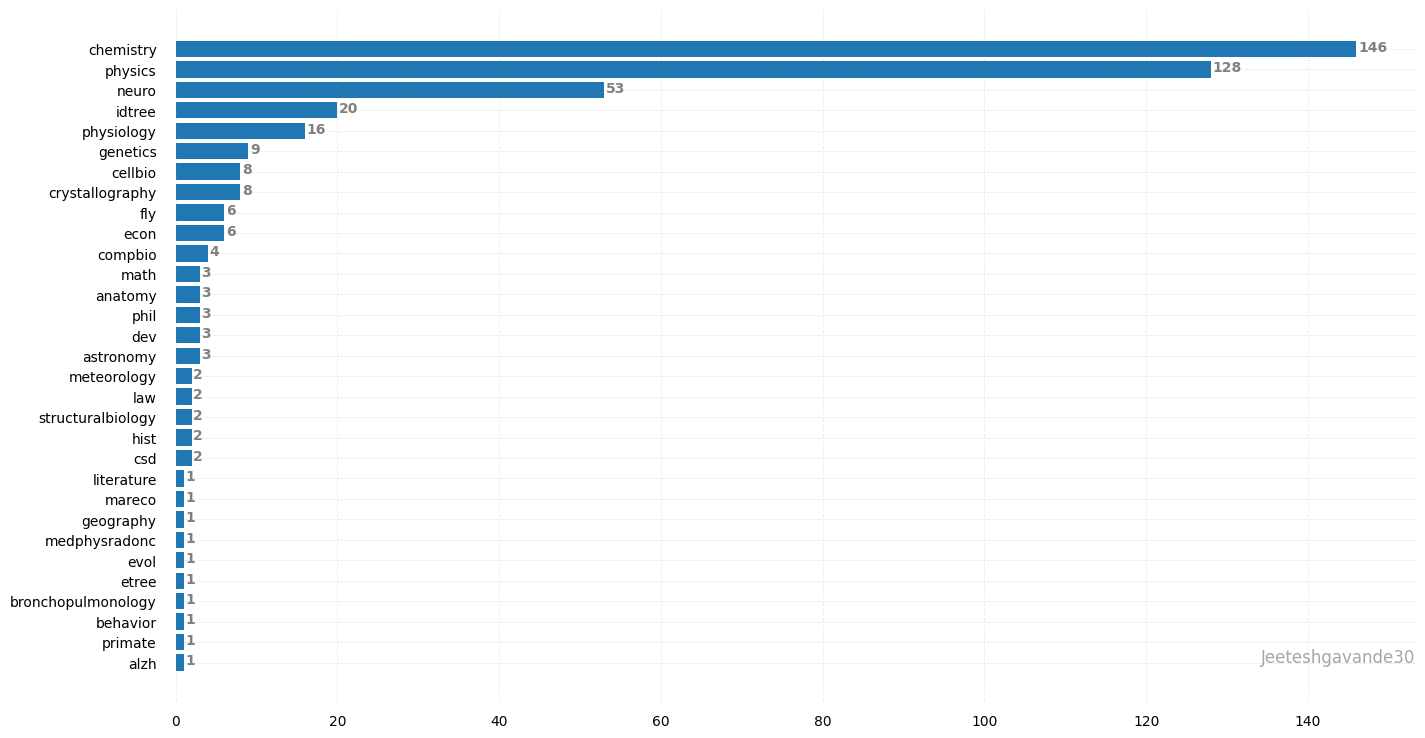

In [8]:
name =  exploded_data["research_area"]
coun = exploded_data["count"]
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(name, coun)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
plt.show()

In [9]:
counts =df1["location"].value_counts()
counts 

University of Cambridge                                              20
Harvard University                                                   10
California Institute of Technology                                    9
University of California, Berkeley                                    9
University of Chicago                                                 8
                                                                     ..
Kiel, Tübingen, Würzburg, Royal Academy for Agriculture in Berlin     1
Institute for Physical. Chemistry and Electrochemistry                1
University of Groningen                                               1
Wellesley College                                                     1
Stockholm University                                                  1
Name: location, Length: 173, dtype: int64

<AxesSubplot: xlabel='count', ylabel='location'>

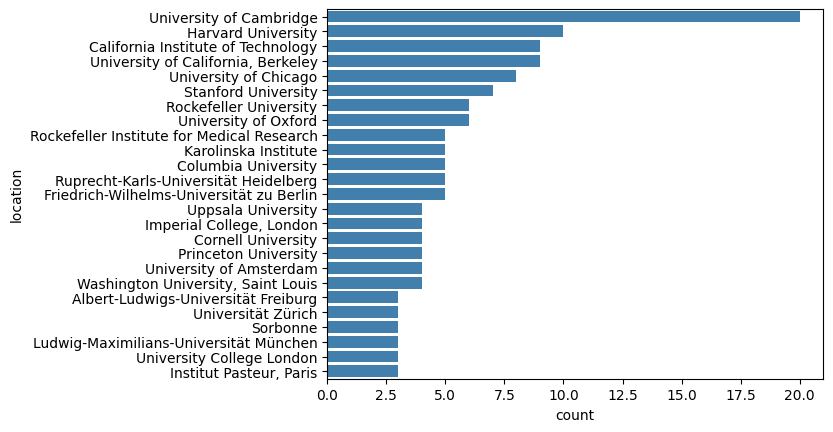

In [10]:
df_filtered = df1[~df1['location'].isin(counts[counts <=2].index)]
sns.countplot(y=df_filtered["location"],color="#3182bd",order = df_filtered['location'].value_counts().index)

In [11]:
df2 =  pd.read_csv("nobel_prize_data/data/event_data.csv")
df2

,cat,year,ids,nominees,nominators
0,Phy,1901,3,511,9713
1,Phy,1901,453,511,8900
2,Phy,1901,849,802,949
3,Phy,1901,1232,1568,3795
4,Phy,1901,1607,1568,6670
...,...,...,...,...,...
24827,Pea,1967,19553,11715,14401
24828,Pea,1967,19555,11715,181
24829,Pea,1967,19554,11715,1143
24830,Pea,1967,19556,10295,14063


In [12]:
#event_data.csv and edges.RData are similar
edges = pyreadr.read_r('nobel_prize_data/data/edges.RData')['edges']
edges

,cat,year,from,fromRole,to,toRole
0,Phy,1901,Q57078,Nominator,Q80956,Nominee
1,Phy,1901,Q6195832,Nominator,Q80956,Nominee
2,Phy,1901,Q18425,Nominator,Q41269,Nominee
3,Phy,1901,Q312288,Nominator,Q353818,Nominee
4,Phy,1901,Q164401,Nominator,Q353818,Nominee
...,...,...,...,...,...,...
162424,Med,1953,Q237142,Committee,Q117474,Nominee
162425,Med,1953,Q237142,Committee,Q21032025,Nominee
162426,Med,1953,Q237142,Committee,881,Nominee
162427,Med,1953,Q237142,Committee,Q1174949,Nominee


In [13]:
counts =edges["year"].value_counts()
counts 

1953    5413
1934    4525
1950    4346
1952    4250
1948    4247
        ... 
1902    1175
1944    1149
1906    1124
1903    1056
1971     138
Name: year, Length: 71, dtype: int64

In [14]:
counts =edges["cat"].value_counts()
counts 

Med    90422
Che    31615
Phy    31089
Pea     5214
Lit     4089
Name: cat, dtype: int64

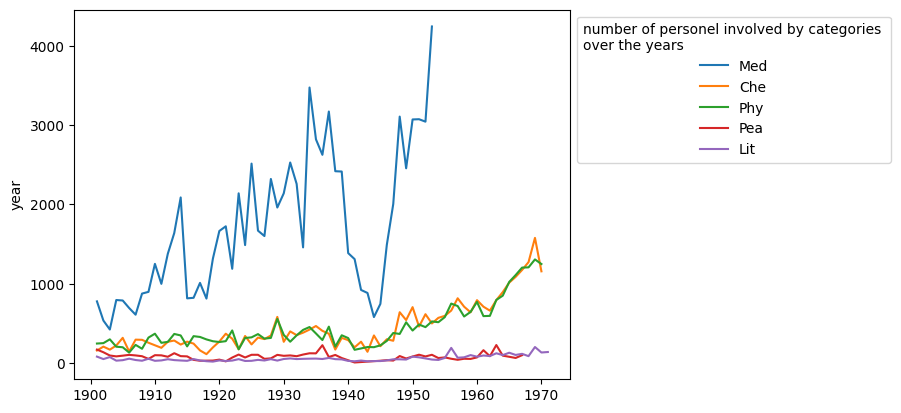

In [15]:
Med = edges[edges['cat'] == 'Med']
counts_Med =Med["year"].value_counts()
counts_Med =counts_Med.to_frame()
Che = edges[edges['cat'] == 'Che']
counts_Che =Che["year"].value_counts()
counts_Che =counts_Che.to_frame()
Phy = edges[edges['cat'] == 'Phy']
counts_Phy =Phy["year"].value_counts()
counts_Phy =counts_Phy.to_frame()
Pea = edges[edges['cat'] == 'Pea']
counts_Pea =Pea["year"].value_counts()
counts_Pea =counts_Pea.to_frame()
Lit = edges[edges['cat'] == 'Lit']
counts_Lit =Lit["year"].value_counts()
counts_Lit =counts_Lit.to_frame()
ax=sns.lineplot(data=counts_Med, x=counts_Med.index, y=counts_Med["year"], label= 'Med')
ax1=sns.lineplot(data=counts_Che, x=counts_Che.index, y=counts_Che["year"], label= 'Che')
ax1=sns.lineplot(data=counts_Phy, x=counts_Phy.index, y=counts_Phy["year"], label= 'Phy')
ax1=sns.lineplot(data=counts_Pea, x=counts_Pea.index, y=counts_Pea["year"], label= 'Pea')
ax1=sns.lineplot(data=counts_Lit, x=counts_Lit.index, y=counts_Lit["year"], label= 'Lit')
plt.legend(title = "number of personel involved by categories \nover the years")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

In [16]:
counts_role =edges["fromRole"].value_counts()
counts_role

Committee    137597
Nominator     24832
Name: fromRole, dtype: int64

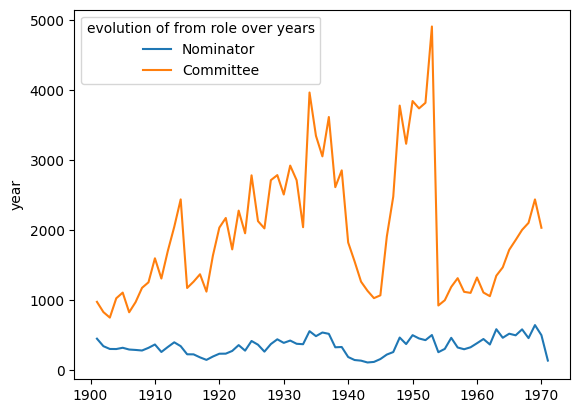

In [17]:
Nominator = edges[edges['fromRole'] == 'Nominator']
counts_Nominator =Nominator["year"].value_counts()
counts_Nominator =counts_Nominator.to_frame()
Committee = edges[edges['fromRole'] == 'Committee']
counts_Committee =Committee["year"].value_counts()
counts_Committee =counts_Committee.to_frame()
ax=sns.lineplot(data=counts_Nominator, x=counts_Nominator.index, y=counts_Nominator["year"], label= 'Nominator')
ax1=sns.lineplot(data=counts_Committee, x=counts_Committee.index, y=counts_Committee["year"], label= 'Committee')
plt.legend(title = "evolution of from role over years")

In [18]:
counts_torole =edges["toRole"].value_counts()
counts_torole

Nominator    87046
Nominee      75383
Name: toRole, dtype: int64

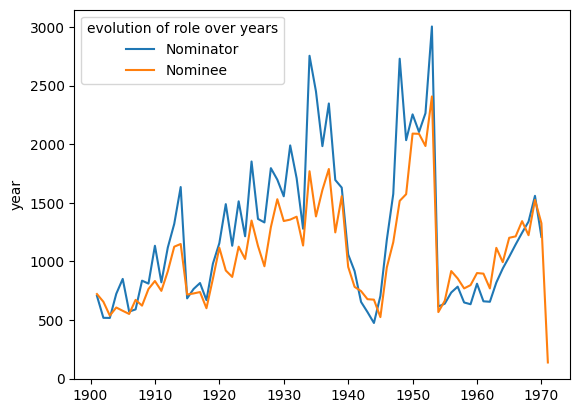

In [19]:
Nominator = edges[edges['toRole'] == 'Nominator']
counts_Nominator =Nominator["year"].value_counts()
counts_Nominator =counts_Nominator.to_frame()
Nominee = edges[edges['toRole'] == 'Nominee']
counts_Nominee =Nominee["year"].value_counts()
counts_Nominee =counts_Nominee.to_frame()
ax=sns.lineplot(data=counts_Nominator, x=counts_Nominator.index, y=counts_Nominator["year"], label= 'Nominator')
ax1=sns.lineplot(data=counts_Nominee, x=counts_Nominee.index, y=counts_Nominee["year"], label= 'Nominee')
plt.legend(title = "evolution of role over years")

In [20]:
df3 =  pd.read_csv("nobel_prize_data/data/nodes.csv")
df3=df3.drop(columns=['link'])
df3

,QID,name,gender,birth_dates,dates_of_death,languagesSpoken,birthCountry,NobelIDs,TreeIDs,LaureateIDs,occupation,educatedAt,employedAt,citizenshipCountry
0,Q1001,Mohandas Karamchand Gandhi,male,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z,Gujarati,India,3320,NaN,NaN,"writer, politician, jurist, barrister, civil r...","University College London, Inner Temple, Alfre...",NaN,"India, British Raj, Dominion of India"
1,Q100298577,Elisabeth Morén,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,NaN,"Karolinska Institute, Dalarna County Council",NaN
2,Q100305569,Shady Mansour Kamal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,NaN,Karolinska Institute,NaN
3,Q100311122,Lars O Tjernberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,Karolinska Institute,Karolinska Institute,NaN
4,Q100311956,Vinko Palada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,NaN,"University of Helsinki, Karolinska Institute",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,Q99616674,Nuno Rufino de Sousa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,NaN,Karolinska Institute,NaN
9677,Q99622,Abraham Esau,male,1884-06-07T00:00:00Z,1955-05-12T00:00:00Z,German,Poland,2833,NaN,NaN,"physicist, university teacher, nuclear physici...","Humboldt University of Berlin, Gdańsk Universi...","Technical University of Berlin, Humboldt Unive...",Germany
9678,Q99638345,Dwight Clark Carpenter,male,1890-06-06T00:00:00Z,1953-01-14T00:00:00Z,NaN,NaN,1616,NaN,NaN,"molecular biophysics, professor, chemist","University of Michigan, Michigan State University","California Institute of Technology, New York S...",NaN
9679,Q99720032,Louise Lundborg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,researcher,NaN,Karolinska Institute,NaN


In [21]:
laureates = df3[~df3['LaureateIDs'].isna()][['QID']]
laureates['laureate']=True
nominations_data = edges[(edges['fromRole']=='Nominator')&(edges['toRole']=='Nominee')]
num_nom = nominations_data[['from', 'to']].groupby('to').count().sort_values('from').rename(columns={'from':'num_nominations'})
num_nom = num_nom.reset_index().merge(laureates, left_on='to', right_on='QID', how='left').drop(columns=['QID']).fillna(False)
num_nom

,to,num_nominations,laureate
0,10016,1,False
1,Q17561228,1,False
2,Q17540053,1,False
3,Q174743,1,False
4,Q17418324,1,False
...,...,...,...
3557,Q172840,134,True
3558,Q12565,135,False
3559,Q252420,137,True
3560,Q673325,155,False


<AxesSubplot: xlabel='laureate', ylabel='num_nominations'>

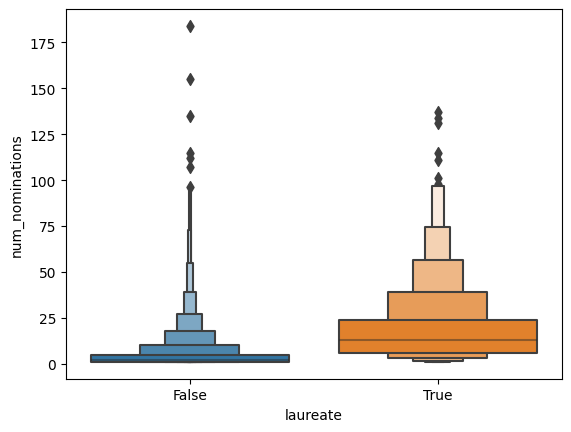

In [22]:
sns.boxenplot(num_nom, x='laureate', y='num_nominations')

In [23]:
#both R files  and csv are identical we will continue work with csv
df3_1 = pyreadr.read_r('nobel_prize_data/data/nodes.RData')['nodes']
df3_1=df3_1.drop(columns=['link'])
df3_1

,QID,name,gender,birth_dates,dates_of_death,languagesSpoken,birthCountry,NobelIDs,TreeIDs,LaureateIDs,occupation,educatedAt,employedAt,citizenshipCountry
0,Q1001,Mohandas Karamchand Gandhi,male,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z,Gujarati,India,3320,,NaN,"writer, politician, jurist, barrister, civil r...","University College London, Inner Temple, Alfre...",,"India, British Raj, Dominion of India"
1,Q100298577,Elisabeth Morén,female,,,,,,,NaN,researcher,,"Karolinska Institute, Dalarna County Council",
2,Q100305569,Shady Mansour Kamal,,,,,,,,NaN,researcher,,Karolinska Institute,
3,Q100311122,Lars O Tjernberg,,,,,,,,NaN,researcher,Karolinska Institute,Karolinska Institute,
4,Q100311956,Vinko Palada,,,,,,,,NaN,researcher,,"University of Helsinki, Karolinska Institute",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,Q99616674,Nuno Rufino de Sousa,,,,,,,,NaN,researcher,,Karolinska Institute,
9677,Q99622,Abraham Esau,male,1884-06-07T00:00:00Z,1955-05-12T00:00:00Z,German,Poland,2833,,NaN,"physicist, university teacher, nuclear physici...","Humboldt University of Berlin, Gdańsk Universi...","Technical University of Berlin, Humboldt Unive...",Germany
9678,Q99638345,Dwight Clark Carpenter,male,1890-06-06T00:00:00Z,1953-01-14T00:00:00Z,,,1616,,NaN,"molecular biophysics, professor, chemist","University of Michigan, Michigan State University","California Institute of Technology, New York S...",
9679,Q99720032,Louise Lundborg,,,,,,,,NaN,researcher,,Karolinska Institute,


In [24]:
#both people_data_expanded.csv file  and RSAS_members.csv are identical we will continue work with people_data_expanded.csv
df4 =  pd.read_csv("nobel_prize_data/data/people_data_expanded.csv")
df4

,itemLabel,nobelIDLabel,sex_or_genderLabel,date_of_birth,birthplaceLabel,country_of_citizenshipLabel,date_of_death,educated_atLabel,employerLabel,languageLabel
0,Frederick Charles Frank,10953,male,1911-03-06T00:00:00Z,Durban,United Kingdom of Great Britain and Ireland,1998-04-05T00:00:00Z,Lincoln College,University of Bristol,English
1,Reginald W. James,4538,male,1891-01-09T00:00:00Z,London,United Kingdom,1964-07-07T00:00:00Z,St John's College,University of Cape Town,English
2,Joseph Klausner,4882,male,1874-08-14T00:00:00Z,Valkininkai,Russian Empire,1958-10-27T00:00:00Z,Heidelberg University,Hebrew University of Jerusalem,Yiddish
3,Mario Praz,12332,male,1896-09-06T00:00:00Z,Rome,Italy,1982-03-23T00:00:00Z,University of Bologna,Sapienza University of Rome,German
4,Mario Praz,12332,male,1896-09-06T00:00:00Z,Rome,Italy,1982-03-23T00:00:00Z,University of Bologna,Sapienza University of Rome,English
...,...,...,...,...,...,...,...,...,...,...
22448,Konrad Emil Bloch,11154,male,1912-01-21T00:00:00Z,Nysa,Germany,2000-10-15T00:00:00Z,Columbia University,Harvard University,German
22449,Ladislaus Laszlo Marton,11414,male,1901-08-15T00:00:00Z,Budapest,Hungary,1979-01-01T00:00:00Z,NaN,NaN,NaN
22450,Fritz Mietzsch,6271,male,1896-05-28T00:00:00Z,Dresden,Germany,1958-11-29T00:00:00Z,NaN,TU Dresden,German
22451,Konrad Emil Bloch,11154,male,1912-01-21T00:00:00Z,Nysa,United States of America,2000-10-15T00:00:00Z,Ludwig Maximilian University of Munich,University of Chicago,German


In [25]:
df4 =df4.drop_duplicates(subset=['nobelIDLabel'])
df4

,itemLabel,nobelIDLabel,sex_or_genderLabel,date_of_birth,birthplaceLabel,country_of_citizenshipLabel,date_of_death,educated_atLabel,employerLabel,languageLabel
0,Frederick Charles Frank,10953,male,1911-03-06T00:00:00Z,Durban,United Kingdom of Great Britain and Ireland,1998-04-05T00:00:00Z,Lincoln College,University of Bristol,English
1,Reginald W. James,4538,male,1891-01-09T00:00:00Z,London,United Kingdom,1964-07-07T00:00:00Z,St John's College,University of Cape Town,English
2,Joseph Klausner,4882,male,1874-08-14T00:00:00Z,Valkininkai,Russian Empire,1958-10-27T00:00:00Z,Heidelberg University,Hebrew University of Jerusalem,Yiddish
3,Mario Praz,12332,male,1896-09-06T00:00:00Z,Rome,Italy,1982-03-23T00:00:00Z,University of Bologna,Sapienza University of Rome,German
5,Giuseppe Brotzu,13722,male,1895-01-24T00:00:00Z,Cagliari,Italy,1976-04-08T00:00:00Z,University of Bologna,University of Modena and Reggio Emilia,Italian
...,...,...,...,...,...,...,...,...,...,...
22426,Viktorin Vojtěch,9700,male,1879-07-16T00:00:00Z,Plzeň,Czechoslovakia,1948-07-11T00:00:00Z,"Faculty of Arts, Charles University in Prague",NaN,NaN
22431,Juan Domingo Perón,7125,male,1895-10-08T00:00:00Z,Lobos,Argentina,1974-07-01T00:00:00Z,Nation Military College,NaN,Spanish
22440,Armand Gautier,3364,male,1837-09-23T00:00:00Z,Narbonne,France,1920-07-27T00:00:00Z,University of Montpellier,University of Paris,French
22444,Jan Reychman,12447,male,1910-02-19T00:00:00Z,Warsaw,NaN,1975-01-11T00:00:00Z,University of Warsaw,NaN,NaN


In [26]:
counts =df4["itemLabel"].value_counts()
counts 

Ladislas Joseph Meduna     3
William Draper Harkins     2
Gertrud von Le Fort        2
Oscar Loew                 2
Gregory Shwartzman         2
                          ..
Henriette Roland Holst     1
Leon Edel                  1
Francis Bull               1
Jean-Louis Flecniakoska    1
Fritz Mietzsch             1
Name: itemLabel, Length: 4093, dtype: int64

In [27]:
counts =df4["sex_or_genderLabel"].value_counts()
counts 

male      3948
female     153
Name: sex_or_genderLabel, dtype: int64

<AxesSubplot: xlabel='count', ylabel='sex_or_genderLabel'>

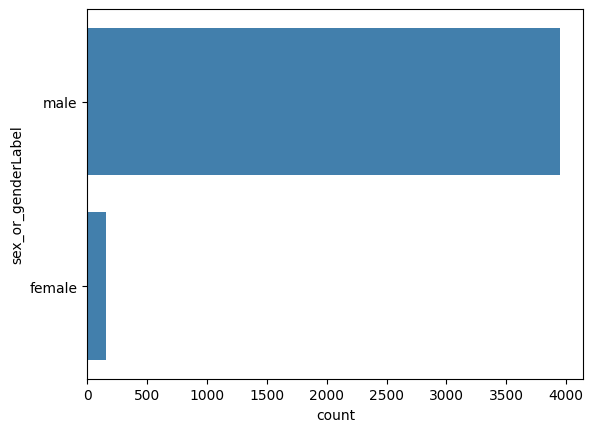

In [28]:
sns.countplot(y=df4["sex_or_genderLabel"],color="#3182bd",order = df4['sex_or_genderLabel'].value_counts().index)

In [29]:
counts =df4["country_of_citizenshipLabel"].value_counts()
counts 

United States of America    693
Germany                     493
France                      423
United Kingdom              244
Sweden                      237
                           ... 
Czech Republic                1
Ethiopian Empire              1
Ireland                       1
Russian Republic              1
Pakistan                      1
Name: country_of_citizenshipLabel, Length: 119, dtype: int64

<AxesSubplot: xlabel='count', ylabel='country_of_citizenshipLabel'>

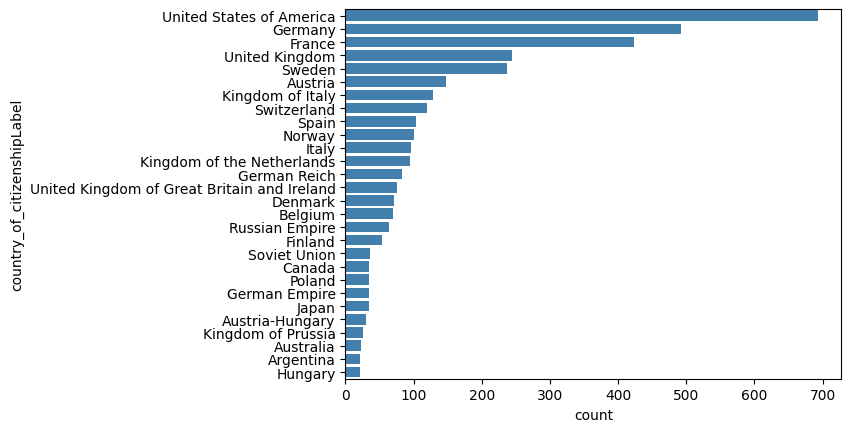

In [30]:
df_filtered = df4[~df4['country_of_citizenshipLabel'].isin(counts[counts <=20].index)]
counts_coun =df4["country_of_citizenshipLabel"].value_counts().to_frame()
sns.countplot(y=df_filtered["country_of_citizenshipLabel"],color="#3182bd",order = df_filtered['country_of_citizenshipLabel'].value_counts().index)

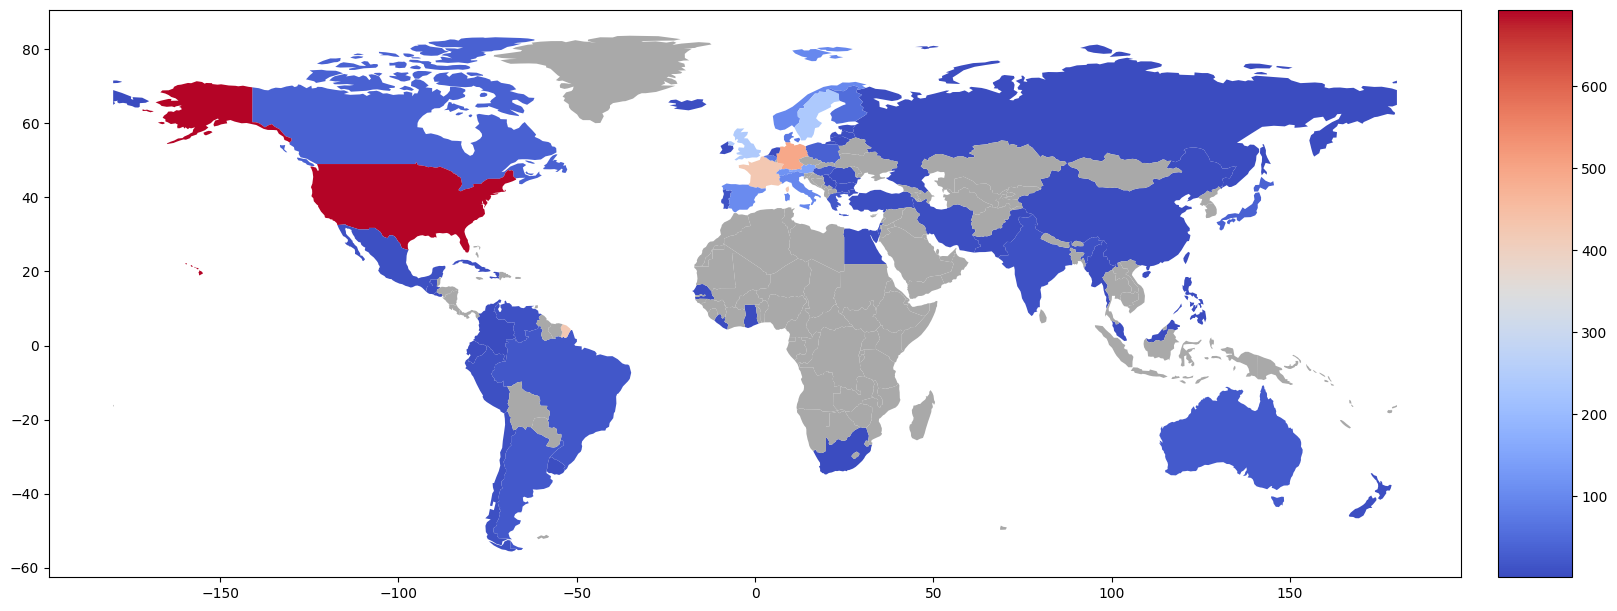

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import geopandas
plt.rcParams['figure.figsize'] = [20, 15]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world=world.set_index('name')
world = pd.concat([world, counts_coun], axis=1)
world = world[(world.index!="Antarctica")]
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='country_of_citizenshipLabel',ax=ax, legend=True, cmap="coolwarm", cax=cax ,missing_kwds={'color': 'Darkgrey'});



In [32]:
counts =df4["birthplaceLabel"].value_counts()
counts 

Vienna           80
Paris            68
Berlin           66
London           43
New York City    40
                 ..
Q10706262         1
Fulda             1
Bratislava        1
Messkirch         1
Lobos             1
Name: birthplaceLabel, Length: 2252, dtype: int64

<AxesSubplot: xlabel='count', ylabel='birthplaceLabel'>

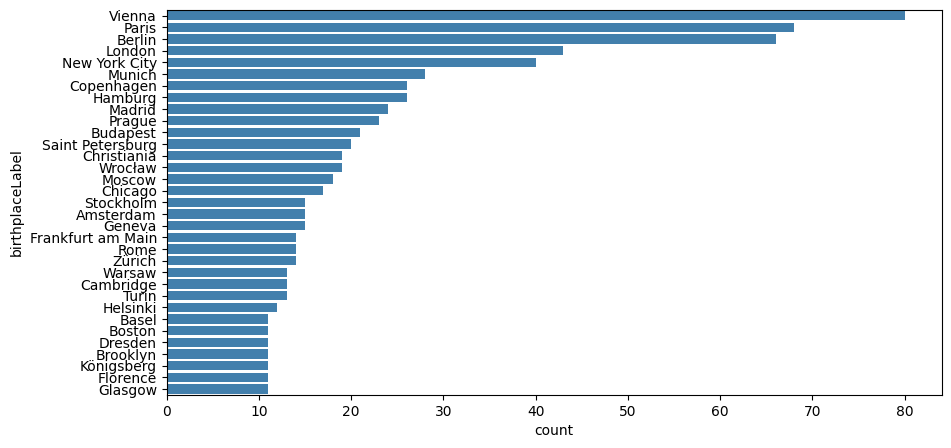

In [33]:
plt.rcParams['figure.figsize'] = [10, 5]
df_filtered = df4[~df4['birthplaceLabel'].isin(counts[counts <=10].index)]
sns.countplot(y=df_filtered["birthplaceLabel"],color="#3182bd",order = df_filtered['birthplaceLabel'].value_counts().index)

In [34]:
counts =df4["educated_atLabel"].value_counts()
counts 

University of Vienna                              97
Humboldt University of Berlin                     88
Uppsala University                                60
Ludwig Maximilian University of Munich            57
École normale supérieure                          56
                                                  ..
University of Wisconsin–Oshkosh                    1
Université de Nancy                                1
University of Michigan Medical School              1
National University of St Augustin of Arequipa     1
Nation Military College                            1
Name: educated_atLabel, Length: 745, dtype: int64

In [35]:
df_filtered = df4[~df4['educated_atLabel'].isin(counts[counts <=15].index)]

<AxesSubplot: xlabel='count', ylabel='educated_atLabel'>

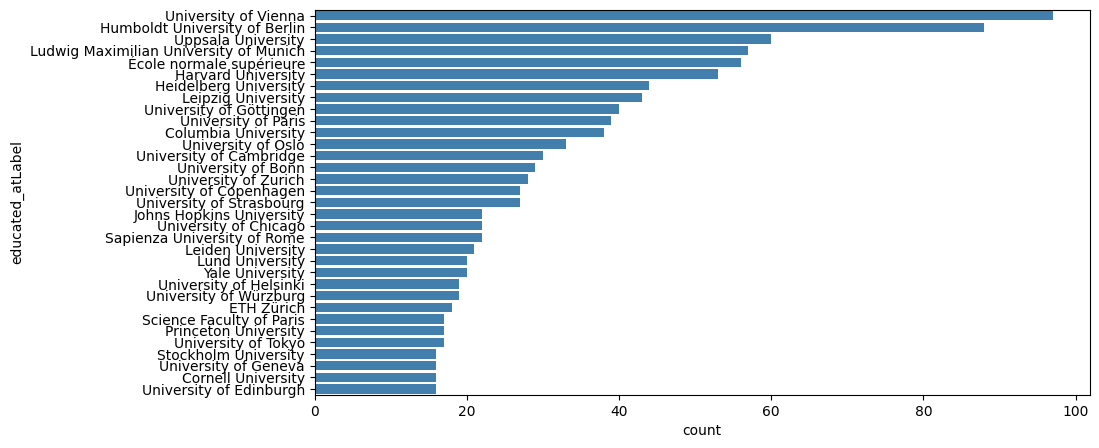

In [36]:
sns.countplot(y=df_filtered["educated_atLabel"],color="#3182bd",order = df_filtered['educated_atLabel'].value_counts().index)

In [37]:
counts =df4["employerLabel"].value_counts()
counts 

Harvard University                                73
University of Vienna                              64
University of Paris                               59
Humboldt University of Berlin                     57
Uppsala University                                49
                                                  ..
University of Jyväskylä                            1
Faculté de théologie protestante de Strasbourg     1
Kogakuin University                                1
University of Warwick                              1
Nagoya University                                  1
Name: employerLabel, Length: 604, dtype: int64

<AxesSubplot: xlabel='count', ylabel='employerLabel'>

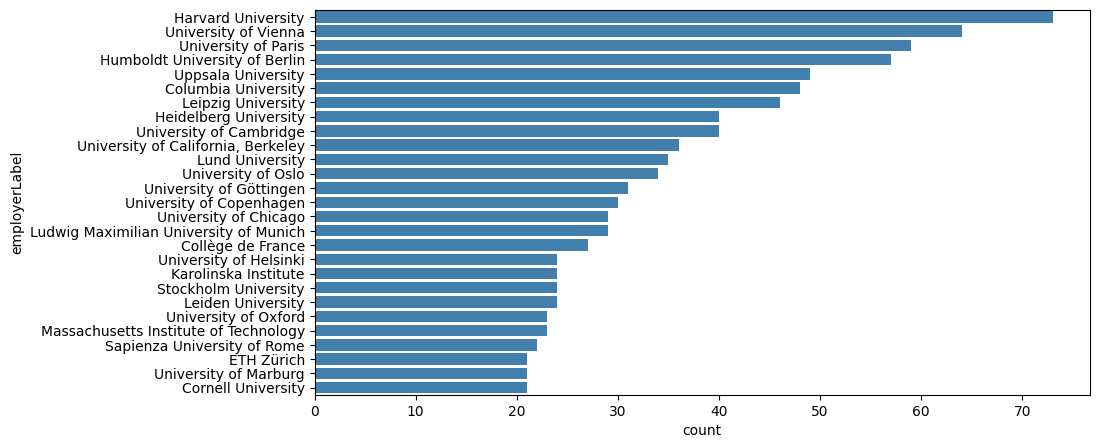

In [38]:
df_filtered = df4[~df4['employerLabel'].isin(counts[counts <=20].index)]
sns.countplot(y=df_filtered["employerLabel"],color="#3182bd",order = df_filtered['employerLabel'].value_counts().index)